In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [2]:
# VARS

period_of_time = 7 # weekly
country = 'Poland'


In [3]:
# downloading data

covid_data = requests.get(
    'https://opendata.ecdc.europa.eu/covid19/testing/csv/data.csv')

with open('covid_data.csv', 'wb') as f:
    f.write(covid_data.content)


In [4]:
df = pd.read_csv('covid_data.csv')
df = df[['country', 'year_week', 'level', 'new_cases', 'tests_done']]
df = df[df.country == f'{country}']
df = df.tail(period_of_time)
df = df.assign(cases_divided_by_tests = lambda x: (x.new_cases / x.tests_done))
df

,country,year_week,level,new_cases,tests_done,cases_divided_by_tests
3497,Poland,2022-W35,national,20183.0,67265.0,0.300052
3498,Poland,2022-W36,national,25348.0,74602.0,0.339776
3499,Poland,2022-W37,national,32117.0,92752.0,0.346267
3500,Poland,2022-W38,national,28685.0,94945.0,0.302122
3501,Poland,2022-W39,national,23613.0,86244.0,0.273793
3502,Poland,2022-W40,national,17903.0,78089.0,0.229264
3503,Poland,2022-W41,national,11490.0,64620.0,0.177809


In [5]:
# year_week

year_week = df['year_week'].iloc[-1]
year_week = year_week.split('-')
year: int = int(year_week[0])
day = int(year_week[-1][1:]) * 7
from time import strptime, strftime
from datetime import datetime
last_update = strptime(f'{year} {day-1}', '%Y %j')
print(last_update)
print(last_update.tm_year, last_update.tm_mon, last_update.tm_mday)

time.struct_time(tm_year=2022, tm_mon=10, tm_mday=13, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=3, tm_yday=286, tm_isdst=-1)
2022 10 13


In [6]:
y1 = df['new_cases']
y2 = df['tests_done']
y3 = np.arange(0, period_of_time, 1).reshape(period_of_time, 1)
x = np.arange(0, period_of_time, 1).reshape(period_of_time, 1)

last_week_avg = int(df.tail(1).new_cases/7)


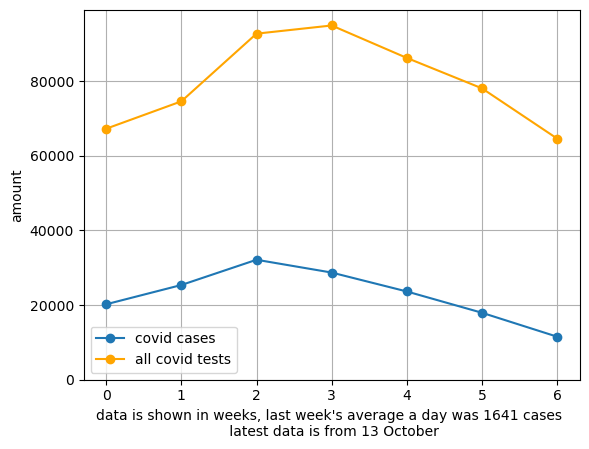

In [7]:
# plotting
fig, ax = plt.subplots()

# getting the data
ax.plot(x, y1, '-o', label = 'covid cases')
ax.plot(x, y2, '-o', color='orange', label = 'all covid tests')

# unhelpful comment of x and y axis
plt.ylabel(f'amount')
from calendar import month_name
last_update_month = month_name[last_update.tm_mon]
plt.xlabel(f'data is shown in weeks, last week\'s average a day was {last_week_avg} cases \n latest data is from {last_update.tm_mday} {last_update_month}')
# setting up a legend
ax.legend(loc='lower left')

ax.grid()
# plot starts at 0
plt.ylim(0)
plt.savefig('covid_daily.jpeg')


In [8]:
plt.close()